In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MASTER/DATASCIENCE/PROYECTO/DATOS/Gasto_Medio_Diario_Persona_Prov.csv', sep=';', decimal=',')

In [4]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,01/01/2018,Andalucía,102
1,02/01/2018,Andalucía,102
2,03/01/2018,Andalucía,102
3,04/01/2018,Andalucía,102
4,05/01/2018,Andalucía,102


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,2018-01-01,Andalucía,102
1,2018-01-02,Andalucía,102
2,2018-01-03,Andalucía,102
3,2018-01-04,Andalucía,102
4,2018-01-05,Andalucía,102


In [8]:
df = df.set_index('FECHA')
df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Andalucía,102
2018-01-02,Andalucía,102
2018-01-03,Andalucía,102
2018-01-04,Andalucía,102
2018-01-05,Andalucía,102


In [9]:
barcelona_df = df[df["Provincia"] == "Cataluña"]


In [10]:
barcelona_df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Cataluña,174
2018-01-02,Cataluña,174
2018-01-03,Cataluña,174
2018-01-04,Cataluña,174
2018-01-05,Cataluña,174


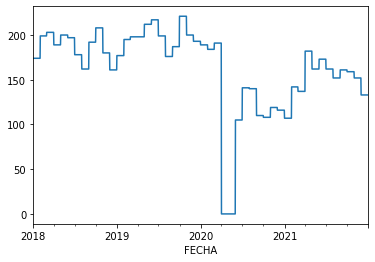

In [11]:
barcelona_df['Gasto_Medio_Diario'].plot()

In [12]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':barcelona_df.index,'y':barcelona_df.Gasto_Medio_Diario})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,174
2018-01-02,2018-01-02,174
2018-01-03,2018-01-03,174
2018-01-04,2018-01-04,174
2018-01-05,2018-01-05,174


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


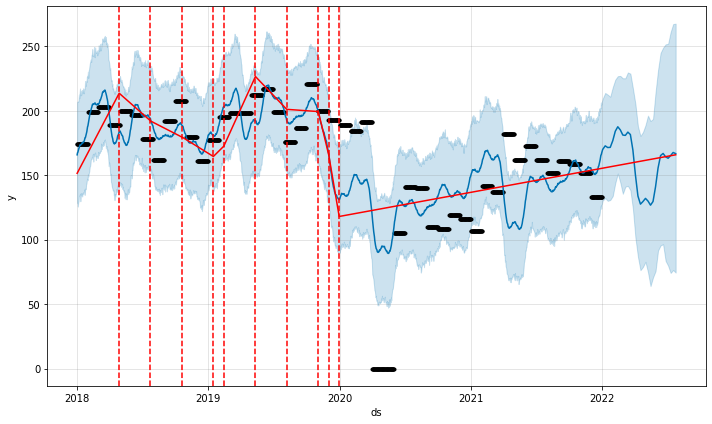

In [13]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [14]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,165.861554,128.462347,206.701126
1,2018-01-02,167.409893,128.279440,207.240227
2,2018-01-03,167.827388,125.701540,206.976437
3,2018-01-04,168.986647,128.795834,206.888120
4,2018-01-05,169.906827,129.811247,208.586340


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1486,2022-06-26,164.458719,83.579351,251.597686,93.922918,244.236351,-0.130556,-0.130556,-0.130556,-0.237929,-0.237929,-0.237929,0.107374,0.107374,0.107374,0.0,0.0,0.0,164.328163
1487,2022-07-03,164.816740,79.811933,252.046986,91.301616,247.463154,-1.625447,-1.625447,-1.625447,-0.237929,-0.237929,-0.237929,-1.387518,-1.387518,-1.387518,0.0,0.0,0.0,163.191292
1488,2022-07-10,165.174760,74.200371,261.160195,87.138701,252.349682,0.124536,0.124536,0.124536,-0.237929,-0.237929,-0.237929,0.362466,0.362466,0.362466,0.0,0.0,0.0,165.299297
1489,2022-07-17,165.532781,76.483329,267.343247,83.096446,257.314324,2.157461,2.157461,2.157461,-0.237929,-0.237929,-0.237929,2.395390,2.395390,2.395390,0.0,0.0,0.0,167.690241
1490,2022-07-24,165.890801,74.439677,267.664442,78.400661,262.265577,0.902428,0.902428,0.902428,-0.237929,-0.237929,-0.237929,1.140358,1.140358,1.140358,0.0,0.0,0.0,166.793229


In [16]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('gasto_barcelona.csv',  index=False, sep=";", decimal=",")